<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Прогнозирование оттока клиента Банка

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Описание данных**

Признаки

    RowNumber — индекс строки в данных
    CustomerId — уникальный идентификатор клиента
    Surname — фамилия
    CreditScore — кредитный рейтинг
    Geography — страна проживания
    Gender — пол
    Age — возраст
    Tenure — сколько лет человек является клиентом банка
    Balance — баланс на счёте
    NumOfProducts — количество продуктов банка, используемых клиентом
    HasCrCard — наличие кредитной карты
    IsActiveMember — активность клиента
    EstimatedSalary — предполагаемая зарплата

Целевой признак

    Exited — факт ухода клиента


In [40]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

from sklearn.utils import shuffle

from sklearn.metrics import f1_score, roc_auc_score

## Подготовка данных

Загрузим данные, при этом укажем что колонка 'RowNumber' будет индексом:

In [41]:
# загрузка данных
try:
    df_churn = pd.read_csv('data-files/Churn.csv',index_col='RowNumber')  # Локальный путь
except:
    df_churn = pd.read_csv('/datasets/Churn.csv',index_col='RowNumber')  # Серверный путь

In [42]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           9091 non-null   float64
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1.1+ MB


In [43]:
df_churn.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [44]:
df_churn.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


На данном этапе в данных видны следующие недочеты:
- В колонке 'tenure'  есть пропуски.
- В колонке 'estimated_salary' возможно есть аномалии -- зарплата 11.58.
- Названия колонок не в змеином регистре.

Последний пункт скорее пожелание, чем действительный недочет.


Преведем названия колонок к змеиному регистру:

In [45]:
df_churn.columns = df_churn.columns.str.lower()

In [46]:
df_churn = df_churn.rename(columns={'customerid':'customer_id',
                            'creditscore':'credit_score',
                            'numofproducts':'num_of_products',
                            'hascrcard':'has_cr_card',
                            'isactivemember':'is_active_member',
                            'estimatedsalary':'estimated_salary'})

In [47]:
df_churn.columns

Index(['customer_id', 'surname', 'credit_score', 'geography', 'gender', 'age',
       'tenure', 'balance', 'num_of_products', 'has_cr_card',
       'is_active_member', 'estimated_salary', 'exited'],
      dtype='object')

Посмотрим внимательнее на пропуски в колонке 'tenure':

In [48]:
df_churn[df_churn['tenure'].isna()==True]

,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
RowNumber,,,,,,,,,,,,,
31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0


Явных корреляций между пропусками в колонке 'tenure' и данными из других колонок не обнаружено.

Скорее всего пропуски говорят, что клиент недавно пришел в банк, поэтому заменим пропуски на нули.

In [49]:
df_churn['tenure'] = df_churn['tenure'].fillna(0)

In [50]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   surname           10000 non-null  object 
 2   credit_score      10000 non-null  int64  
 3   geography         10000 non-null  object 
 4   gender            10000 non-null  object 
 5   age               10000 non-null  int64  
 6   tenure            10000 non-null  float64
 7   balance           10000 non-null  float64
 8   num_of_products   10000 non-null  int64  
 9   has_cr_card       10000 non-null  int64  
 10  is_active_member  10000 non-null  int64  
 11  estimated_salary  10000 non-null  float64
 12  exited            10000 non-null  int64  
dtypes: float64(3), int64(7), object(3)
memory usage: 1.1+ MB


Посмотрим колонку 'estimated_salary':

Text(0, 0.5, 'Предполагаемая зарплата')

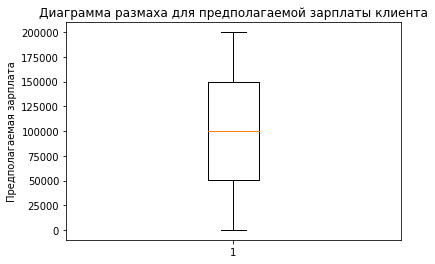

In [51]:
plt.boxplot(df_churn['estimated_salary'])
plt.title('Диаграмма размаха для предполагаемой зарплаты клиента')
plt.ylabel('Предполагаемая зарплата')

На диаграмме размаха не видно выбросов. Такая маленькая зарплата может объясняться нерегулярными подработками или фактом наличия счета в другом банке, который клиент чаще использует.

In [52]:
df_churn[df_churn['estimated_salary']<=100]

,customer_id,surname,credit_score,geography,gender,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited
RowNumber,,,,,,,,,,,,,
2363,15791053,Lucciano,709,Germany,Male,45,4.0,122917.71,1,1,1,11.58,1
5549,15639662,Phillips,710,France,Male,38,2.0,0.00,2,1,0,96.27,0
9011,15786463,Hsing,645,Germany,Female,59,8.0,121669.93,2,0,0,91.75,1
9648,15679693,Walker,625,France,Male,31,5.0,0.00,2,0,1,90.07,0


Проверим данные на наличие дубликатов:

In [53]:
df_churn['gender'].value_counts()

Male      5457
Female    4543
Name: gender, dtype: int64

In [54]:
df_churn['geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: geography, dtype: int64

Неявных дубликатов необнаружено.

In [55]:
df_churn.duplicated().value_counts()

False    10000
dtype: int64

Явных дубликатов тоже необнаружено.

Для дальнейшей работы необходимо перевести колонки 'geogrphy' и 'gender' типа object к числовому типу int (1/0).

Чтобы избежать дамми ловушки используем аргумент `drop_first`=True.

In [56]:
df_churn_ohe = pd.get_dummies(df_churn,columns=['gender','geography'],drop_first=True)

In [57]:
df_churn_ohe.columns = df_churn_ohe.columns.str.lower()
df_churn_ohe

,customer_id,surname,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,exited,gender_male,geography_germany,geography_spain
RowNumber,,,,,,,,,,,,,,
1,15634602,Hargrave,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
2,15647311,Hill,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1
3,15619304,Onio,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
4,15701354,Boni,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
5,15737888,Mitchell,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,39,5.0,0.00,2,1,0,96270.64,0,1,0,0
9997,15569892,Johnstone,516,35,10.0,57369.61,1,1,1,101699.77,0,1,0,0
9998,15584532,Liu,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0


### Вывод

Имеется набор данных о клиенте банка. 
В данных есть информация о возрасте, использованных продуктах, наличия кредитной карты, кредитный рейтинг, пол, предполагаемая заработная плата и страна проживания.

- Для удобства, названия колонок приведены к змеиному регистру.
- Пропуски в колонке 'tenure' были заменены на нули из предположения, что клиент новый и пользуется банком меньше года.
- Аномалий и дубликатов не обнаружено.
- Колонки 'geogrphy' и 'gender' преобразованы методом One-hot-encoding к чиловому типу 1/0.


## Исследование задачи

Разделим данные на обучающую, валидационную и тестовую выборки:

In [58]:
# выделим тестовую выборку
df_train, df_test = train_test_split(df_churn_ohe, test_size=0.2, random_state=12345)

features_test = df_test.drop(['customer_id','surname','exited'], axis=1)
target_test = df_test['exited']

# выделим обучающую и валидационную выборки
df_train, df_valid = train_test_split(df_train, test_size=0.25, random_state=12345)

features_train = df_train.drop(['customer_id','surname','exited'], axis=1)
target_train = df_train['exited']
features_valid = df_valid.drop(['customer_id','surname','exited'], axis=1)
target_valid = df_valid['exited']

Выполним стандартизацию для численных признаков

In [59]:
features_numeric = ['credit_score',
                    'age',
                    'tenure',
                    'balance',
                    'num_of_products',
                    'estimated_salary']

scaler = StandardScaler()

scaler.fit(features_train[features_numeric]) 
features_train[features_numeric] = scaler.transform(features_train[features_numeric])
features_valid[features_numeric] = scaler.transform(features_valid[features_numeric])
features_test[features_numeric] = scaler.transform(features_test[features_numeric])

#pd.options.mode.chained_assignment = None
features_test.head()

,credit_score,age,tenure,balance,num_of_products,has_cr_card,is_active_member,estimated_salary,gender_male,geography_germany,geography_spain
RowNumber,,,,,,,,,,,
7868,-0.123733,0.685430,-0.493375,-1.232442,-0.896909,1,1,0.980212,0,0,1
1403,1.083087,-0.937002,1.102791,0.858518,-0.896909,1,0,-0.390486,1,0,0
8607,1.598822,0.303681,0.145091,-1.232442,0.816929,1,1,-0.435169,1,0,1
8886,0.165078,0.589993,-0.174142,0.412100,0.816929,1,1,1.017079,1,0,1
6495,0.484834,-1.032439,0.783558,-1.232442,0.816929,1,1,-1.343558,1,0,0


In [60]:
# Проверка на соответсвие размеров выборок
print('Размер тестовой выборки:')
print('features_test:',features_test.shape)
print('target_test:',target_test.shape)

print()
print('Размер валидационной выборки:')
print('features_valid:',features_valid.shape)
print('target_valid:',target_valid.shape)

print()
print('Размер обучающей выборки:')
print('features_train:',features_train.shape)
print('target_train:',target_train.shape)

Размер тестовой выборки:
features_test: (2000, 11)
target_test: (2000,)

Размер валидационной выборки:
features_valid: (2000, 11)
target_valid: (2000,)

Размер обучающей выборки:
features_train: (6000, 11)
target_train: (6000,)


Выберем лучшие параметры для моделей типа "дерево решений" и "случайный лес". А также сравним f1-меру для моделей "логическая регрессия", "дерево решений" и "случайный лес" при лучших параметрах.

In [61]:
# DecisionTreeClassifier
def best_papameters_tree(features_train,target_train,features_valid,target_valid):
    best_model_tree = None
    best_f1_tree = 0
    best_depth_tree = 0
    for depth in range(1, 10):
        model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
        model_tree.fit(features_train,target_train)
        predictions_tree = model_tree.predict(features_valid)
        f1_tree = f1_score(target_valid, predictions_tree)
        if f1_tree > best_f1_tree:
            best_model_tree = model_tree
            best_f1_tree = f1_tree
            best_depth_tree = depth
    return best_depth_tree

In [62]:
best_depth_tree = best_papameters_tree(features_train,target_train,features_valid,target_valid)

model_tree = DecisionTreeClassifier(random_state=12345, max_depth=best_depth_tree)
model_tree.fit(features_train,target_train)
predictions_tree = model_tree.predict(features_valid)

probabilities_valid_tree = model_tree.predict_proba(features_valid)
probabilities_valid_tree = probabilities_valid_tree[:, 1]

In [63]:
# RandomForestClassifier
def best_papameters_forest(features_train,target_train,features_valid,target_valid):
    best_model_forest = None
    best_f1_forest = 0
    best_est_forest = 0
    best_depth_forest = 0
    for est in range(1, 50):
        for depth in range (1, 11):
            model_forest = RandomForestClassifier(random_state=12345, n_estimators=est,max_depth=depth)
            model_forest.fit(features_train,target_train)
            predictions_forest = model_forest.predict(features_valid)
            f1_forest = f1_score(target_valid, predictions_forest)
            if f1_forest > best_f1_forest:
                best_model_forest = model_forest
                best_f1_forest = f1_forest
                best_est_forest = est
                best_depth_forest = depth
    return best_depth_forest,best_est_forest

In [64]:
best_depth_forest,best_est_forest = best_papameters_forest(features_train,target_train,features_valid,target_valid)

model_forest = RandomForestClassifier(random_state=12345, n_estimators=best_est_forest,max_depth=best_depth_forest)
model_forest.fit(features_train,target_train)
predictions_forest = model_forest.predict(features_valid)

probabilities_valid_forest = model_forest.predict_proba(features_valid)
probabilities_valid_forest = probabilities_valid_forest[:, 1]

In [65]:
# LogisticRegression
model_log = LogisticRegression(random_state=12345)
model_log.fit(features_train,target_train)
predictions_log = model_log.predict(features_valid)

probabilities_valid_log = model_log.predict_proba(features_valid)
probabilities_valid_log = probabilities_valid_log[:, 1]

In [66]:
f1_tree = f1_score(target_valid, predictions_tree)
f1_forest = f1_score(target_valid, predictions_forest)
f1_log = f1_score(target_valid, predictions_log)

auc_roc_tree = roc_auc_score(target_valid, probabilities_valid_tree)
auc_roc_forest = roc_auc_score(target_valid, probabilities_valid_forest)
auc_roc_log = roc_auc_score(target_valid, probabilities_valid_log)

In [67]:
print("F1-мера моделей на валидационной выборке:")

print("\"дерево решений\":\t", f1_tree, 
      "Глубина дерева:\t", best_depth_tree)

print("\"случайный лес\":\t", f1_forest, 
      "Количество деревьев:", best_est_forest, 
      "Максимальная глубина:\t", best_depth_forest)

print("\"логическая регрессия\":\t", f1_log)

print()
print("AUC ROC моделей на валидационной выборке:")

print("\"дерево решений\":\t", auc_roc_tree, 
      "Глубина дерева:\t", best_depth_tree)

print("\"случайный лес\":\t", auc_roc_forest, 
      "Количество деревьев:", best_est_forest, 
      "Максимальная глубина:\t", best_depth_forest)

print("\"логическая регрессия\":\t", auc_roc_log)

F1-мера моделей на валидационной выборке:
"дерево решений":	 0.5488958990536277 Глубина дерева:	 7
"случайный лес":	 0.5529801324503313 Количество деревьев: 40 Максимальная глубина:	 9
"логическая регрессия":	 0.3056603773584906

AUC ROC моделей на валидационной выборке:
"дерево решений":	 0.8275652142122556 Глубина дерева:	 7
"случайный лес":	 0.8470893423978612 Количество деревьев: 40 Максимальная глубина:	 9
"логическая регрессия":	 0.770792171274433


F1-мера ниже необходимого значения.  Посмотрим на баланс классов.

## Борьба с дисбалансом

In [68]:
class_frequency = target_train.value_counts(normalize=True)
class_frequency

0    0.796833
1    0.203167
Name: exited, dtype: float64

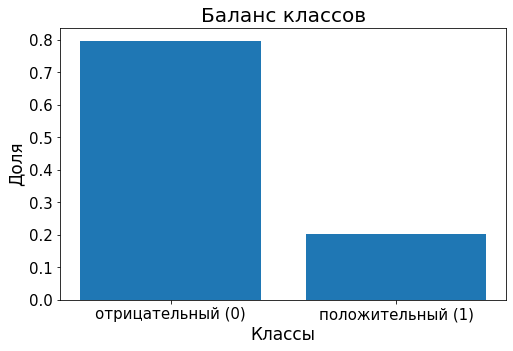

In [69]:
plt.figure(figsize=[8, 5])
ticks_label = ['отрицательный (0)','положительный (1)']

plt.bar(ticks_label, class_frequency)

plt.xticks(ticks_label, fontsize=15)
plt.yticks(fontsize=15)
plt.title('Баланс классов', fontsize=20)
plt.xlabel('Классы', fontsize=17)
plt.ylabel('Доля', fontsize=17)

plt.show()

В данных явно преобладает отрицательный класс. Сбалансируем классы увеличением числа положительных объектов.

In [70]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, 
                                                target_train, 
                                                round(class_frequency[0]/class_frequency[1]) )

In [71]:
print('Размер увеличенной обучающей выборки:')
print('features_train:',features_upsampled.shape)
print('target_train:',target_upsampled.shape)

Размер увеличенной обучающей выборки:
features_train: (9657, 11)
target_train: (9657,)


Посмотрим на метрики моделей обученных на увеличенных тренировочных данных

In [72]:
# DecisionTreeClassifier
best_depth_tree_up = best_papameters_tree(features_upsampled,target_upsampled,features_valid,target_valid)

model_tree = DecisionTreeClassifier(random_state=12345, max_depth=best_depth_tree_up)
model_tree.fit(features_upsampled,target_upsampled)
predictions_tree = model_tree.predict(features_valid)

probabilities_valid_tree = model_tree.predict_proba(features_valid)
probabilities_valid_tree = probabilities_valid_tree[:, 1]

In [73]:
# RandomForestClassifier
best_depth_forest_up, best_est_forest_up = best_papameters_forest(features_upsampled,target_upsampled,
                                                                  features_valid,target_valid)

model_forest = RandomForestClassifier(random_state=12345,
                                      n_estimators=best_est_forest_up,
                                      max_depth=best_depth_forest_up)
model_forest.fit(features_upsampled,target_upsampled)
predictions_forest = model_forest.predict(features_valid)

probabilities_valid_forest = model_forest.predict_proba(features_valid)
probabilities_valid_forest = probabilities_valid_forest[:, 1]

In [74]:
# LogisticRegression
model_log = LogisticRegression(random_state=12345)
model_log.fit(features_upsampled,target_upsampled)
predictions_log = model_log.predict(features_valid)

probabilities_valid_log = model_log.predict_proba(features_valid)
probabilities_valid_log = probabilities_valid_log[:, 1]

In [75]:
f1_tree_up = f1_score(target_valid, predictions_tree)
f1_forest_up = f1_score(target_valid, predictions_forest)
f1_log_up = f1_score(target_valid, predictions_log)

auc_roc_tree_up = roc_auc_score(target_valid, probabilities_valid_tree)
auc_roc_forest_up = roc_auc_score(target_valid, probabilities_valid_forest)
auc_roc_log_up = roc_auc_score(target_valid, probabilities_valid_log)

In [76]:
print("F1-мера моделей на валидационной выборке:")

print("\"дерево решений\":\t", f1_tree_up, 
      "Глубина дерева:\t", best_depth_tree_up)

print("\"случайный лес\":\t", f1_forest_up, 
      "Количество деревьев:", best_est_forest_up, 
      "Максимальная глубина:\t", best_depth_forest_up)

print("\"логическая регрессия\":\t", f1_log_up)

print()
print("AUC ROC моделей на валидационной выборке:")

print("\"дерево решений\":\t", auc_roc_tree_up, 
      "Глубина дерева:\t", best_depth_tree_up)

print("\"случайный лес\":\t", auc_roc_forest_up, 
      "Количество деревьев:", best_est_forest_up, 
      "Максимальная глубина:\t", best_depth_forest_up)

print("\"логическая регрессия\":\t", auc_roc_log_up)

F1-мера моделей на валидационной выборке:
"дерево решений":	 0.5572441742654509 Глубина дерева:	 6
"случайный лес":	 0.5910577971646673 Количество деревьев: 22 Максимальная глубина:	 8
"логическая регрессия":	 0.4783759929390997

AUC ROC моделей на валидационной выборке:
"дерево решений":	 0.8063474477801497 Глубина дерева:	 6
"случайный лес":	 0.8525088258342222 Количество деревьев: 22 Максимальная глубина:	 8
"логическая регрессия":	 0.7729777673222394


F1-мера улучшилась по сравнинию с несбалансированными данными, но все еще ниже необходимого значения в 0.59.

Попробуем сбалансировать классы уменьшением числа отрицательных объектов.

In [77]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, 
                                                target_train, 
                                                round(class_frequency[1]/class_frequency[0],2) )

In [78]:
print('Размер уменьшиной обучающей выборки:')
print('features_train:',features_downsampled.shape)
print('target_train:',target_downsampled.shape)

Размер уменьшиной обучающей выборки:
features_train: (2414, 11)
target_train: (2414,)


Посмотрим на метрики моделей обученных на уменьшиных тренировочных данных

In [79]:
# DecisionTreeClassifier
best_depth_tree_down = best_papameters_tree(features_downsampled,target_downsampled,features_valid,target_valid)

model_tree = DecisionTreeClassifier(random_state=12345, max_depth=best_depth_tree_down)
model_tree.fit(features_downsampled,target_downsampled)
predictions_tree = model_tree.predict(features_valid)

probabilities_valid_tree = model_tree.predict_proba(features_valid)
probabilities_valid_tree = probabilities_valid_tree[:, 1]

In [80]:
# RandomForestClassifier
best_depth_forest_down, best_est_forest_down = best_papameters_forest(features_downsampled,target_downsampled,
                                                                      features_valid,target_valid)

model_forest = RandomForestClassifier(random_state=12345, 
                                      n_estimators=best_est_forest_down,
                                      max_depth=best_depth_forest_down)
model_forest.fit(features_downsampled,target_downsampled)
predictions_forest = model_forest.predict(features_valid)

probabilities_valid_forest = model_forest.predict_proba(features_valid)
probabilities_valid_forest = probabilities_valid_forest[:, 1]

In [81]:
# LogisticRegression
model_log = LogisticRegression(random_state=12345)
model_log.fit(features_downsampled,target_downsampled)
predictions_log = model_log.predict(features_valid)

probabilities_valid_log = model_log.predict_proba(features_valid)
probabilities_valid_log = probabilities_valid_log[:, 1]

In [82]:
f1_tree_down = f1_score(target_valid, predictions_tree)
f1_forest_down = f1_score(target_valid, predictions_forest)
f1_log_down = f1_score(target_valid, predictions_log)

auc_roc_tree_down = roc_auc_score(target_valid, probabilities_valid_tree)
auc_roc_forest_down = roc_auc_score(target_valid, probabilities_valid_forest)
auc_roc_log_down = roc_auc_score(target_valid, probabilities_valid_log)

In [83]:
print("F1-мера моделей на валидационной выборке:")

print("\"дерево решений\":\t", f1_tree_down, 
      "Глубина дерева:\t", best_depth_tree_down)

print("\"случайный лес\":\t", f1_forest_down, 
      "Количество деревьев:", best_est_forest_down, 
      "Максимальная глубина:\t", best_depth_forest_down)

print("\"логическая регрессия\":\t", f1_log_down)

print()
print("AUC ROC моделей на валидационной выборке:")

print("\"дерево решений\":\t", auc_roc_tree_down, 
      "Глубина дерева:\t", best_depth_tree_down)

print("\"случайный лес\":\t", auc_roc_forest_down, 
      "Количество деревьев:", best_est_forest_down, 
      "Максимальная глубина:\t", best_depth_forest_down)

print("\"логическая регрессия\":\t", auc_roc_log_down)

F1-мера моделей на валидационной выборке:
"дерево решений":	 0.5469767441860465 Глубина дерева:	 7
"случайный лес":	 0.577822990844354 Количество деревьев: 20 Максимальная глубина:	 8
"логическая регрессия":	 0.4757709251101322

AUC ROC моделей на валидационной выборке:
"дерево решений":	 0.8160244723176378 Глубина дерева:	 7
"случайный лес":	 0.8419448466824242 Количество деревьев: 20 Максимальная глубина:	 8
"логическая регрессия":	 0.7739791676932345


In [84]:
scores = {
    'data':['unbalanced','balanced_upsampled','balanced_downsampled'],
    'f1_tree':[f1_tree, f1_tree_up, f1_tree_down],
    'f1_forest':[f1_forest, f1_forest_up, f1_forest_down],
    'f1_log':[f1_log, f1_log_up, f1_log_down],
    'auc_roc_tree':[auc_roc_tree, auc_roc_tree_up, auc_roc_tree_down],
    'auc_roc_forest':[auc_roc_forest, auc_roc_forest_up, auc_roc_forest_down],
    'auc_roc_log':[auc_roc_log, auc_roc_log_up, auc_roc_log_down]
}

df_scores = pd.DataFrame(scores)

df_scores.set_index('data',inplace=True)
df_scores = df_scores.transpose()

df_scores

data,unbalanced,balanced_upsampled,balanced_downsampled
f1_tree,0.548896,0.557244,0.546977
f1_forest,0.552980,0.591058,0.577823
f1_log,0.305660,0.478376,0.475771
auc_roc_tree,0.827565,0.806347,0.816024
auc_roc_forest,0.847089,0.852509,0.841945
auc_roc_log,0.770792,0.772978,0.773979


In [85]:
complexity = {
    'data':['unbalanced','balanced_upsampled','balanced_downsampled'],
    'max_depth_tree':[best_depth_tree,best_depth_tree_up,best_depth_tree_down],
    'max_depth_forest':[best_depth_forest,best_depth_forest_up,best_depth_forest_down],
    'n_estimators_forest':[best_est_forest,best_est_forest_up,best_est_forest_down]
}

df_complexity = pd.DataFrame(complexity)

df_complexity.set_index('data',inplace=True)
df_complexity = df_complexity.transpose()

df_complexity

data,unbalanced,balanced_upsampled,balanced_downsampled
max_depth_tree,7,6,7
max_depth_forest,9,8,8
n_estimators_forest,40,22,20


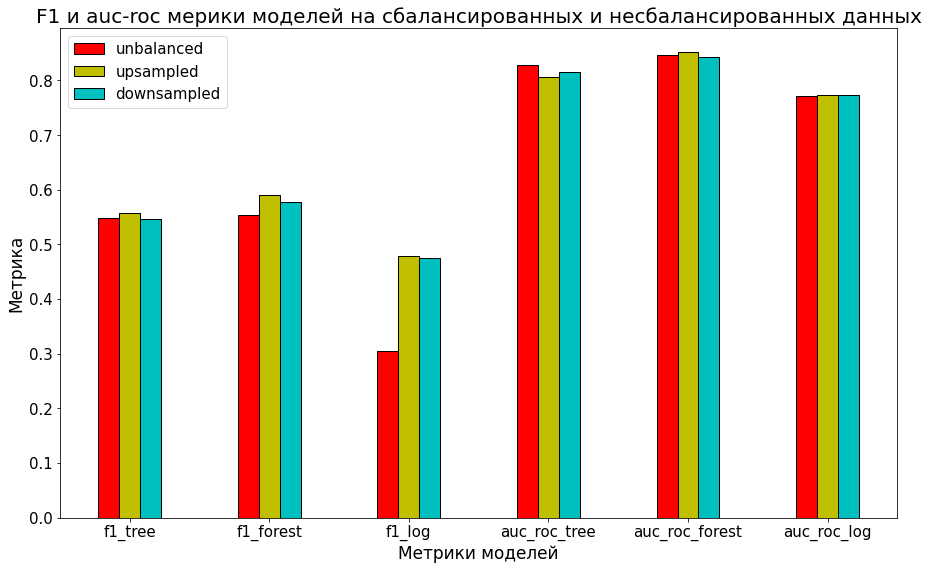

In [86]:
# устанавливаем некоторые параметры рисунка
plt.figure(figsize=[15, 9])
wd = 0.3
x_pos = np.arange(1, 2*len(df_scores), 2)

# Рисуем столбчатую диаграму
plt.bar(x_pos, df_scores['unbalanced'], color='r', width=wd, edgecolor='k',
        label='unbalanced')
plt.bar(x_pos+wd, df_scores['balanced_upsampled'], color='y', width=wd, edgecolor='k', 
        label='upsampled')
plt.bar(x_pos+(wd*2), df_scores['balanced_downsampled'], color='c', width=wd, 
        edgecolor='k', label='downsampled')

# Добавляем подписи
plt.xticks(x_pos+wd, df_scores.index.values, fontsize=15)
plt.yticks(fontsize=15)
plt.title('F1 и auc-roc мерики моделей на сбалансированных и несбалансированных данных', fontsize=20)
plt.xlabel('Метрики моделей', fontsize=17)
plt.ylabel('Метрика', fontsize=17)

plt.legend(loc='upper left', fontsize=15)
plt.show()

**Вывод**

Проверка баланса классов показал что есть большой дисбаланс классов, примерно в 4 раза.

Данные были сбалансированны upsampling и downsampling методами.
Далее модель была обучена уже на новых тренировочных данных данных.

Видно, что балансировка классов повышает точность предсказаний. 
И при этом уменьшает сложность модели "случайный лес".
При балансировке классов методом upsampling метрики немного лучше, чем при downsampling методе.

Желаемое значение F1 метрики достигнуто моделью "случайный лес" с глубиной дерева 8 и количесвом дереьвьев 22.


## Тестирование модели

Для улучщения точности объединим тренировочную и валидационную выборки, сбалансируем, на новой выборке обучим лучшую модель и проверим на тестовой выборке.

In [87]:
features_train_new = pd.concat([features_train] + [features_valid])
target_train_new = pd.concat([target_train] + [target_valid])

print(features_train_new.shape)
print(target_train_new.shape)

(8000, 11)
(8000,)


In [88]:
class_frequency = target_train_new.value_counts(normalize=True)
class_frequency

0    0.79875
1    0.20125
Name: exited, dtype: float64

In [89]:
features_upsampled, target_upsampled = upsample(features_train_new, 
                                                target_train_new, 
                                                round(class_frequency[0]/class_frequency[1]) )
features_upsampled.shape

(12830, 11)

In [90]:
# RandomForestClassifier
model_forest = RandomForestClassifier(random_state=12345,
                                      n_estimators=best_est_forest_up,
                                      max_depth=best_depth_forest_up)
model_forest.fit(features_upsampled,target_upsampled)
predictions_forest = model_forest.predict(features_test)

probabilities_test_forest = model_forest.predict_proba(features_test)
probabilities_test_forest = probabilities_test_forest[:, 1]

f1_forest_up = f1_score(target_test, predictions_forest)
auc_roc_forest_up = roc_auc_score(target_test, probabilities_test_forest)

In [91]:
print("F1-мера модели \"случайный лес\" на тестовой выборке:")

print("\"случайный лес\":\t", f1_forest_up, 
      "Количество деревьев:", best_est_forest_up, 
      "Максимальная глубина:\t", best_depth_forest_up)

print()
print("AUC ROC модели \"случайный лес\"  на тестовой выборке:")

print("\"случайный лес\":\t", auc_roc_forest_up, 
      "Количество деревьев:", best_est_forest_up, 
      "Максимальная глубина:\t", best_depth_forest_up)


F1-мера модели "случайный лес" на тестовой выборке:
"случайный лес":	 0.6246246246246248 Количество деревьев: 22 Максимальная глубина:	 8

AUC ROC модели "случайный лес"  на тестовой выборке:
"случайный лес":	 0.8629924471951298 Количество деревьев: 22 Максимальная глубина:	 8


## Общий вывод
<a id="id_conclusion"></a>

В проекте был проанализирован набор данных с информацией о клиентах банка.

На этапе предобработки:
   - Для удобства, названия колонок приведены к змеиному регистру.
   - Пропуски в колонке 'tenure' были заменены на нули из предположения, что клиент новый и пользуется банком меньше года.
   - Аномалий и дубликатов не обнаружено.
   - Колонки 'geography' и 'gender' преобразованы методом One-hot-encoding к чиловому типу 1/0.

Анализ данных показал сильный дисбаланс классов -- отрицательного класса примерно в 4 раза больше, чем положительного.

Данные были сбалансированны upsampling и downsampling методами. Далее модели "дерево решений", "случайный лес" и "логическая регрессия" были обучены уже на новых тренировочных данных данных.

Видно, что балансировка классов повышает точность предсказаний. И при этом уменьшает сложность модели "случайный лес".

Желаемое значение F1 метрики 0.59 достигнуто моделью "случайный лес" с глубиной дерева 8 и количесвом деревьев 22.

На тестовой выборки данная модель показала значение мертика F1 равное 0.62